# NBaIoT SOMKNN CLASSIFY

## Device 5

- Training on device 5 (using both Mirai and Gafgyt).
- Testing on device 5 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 5

In [8]:
train_index

5

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((62154, 115), (62154,)),
 ((330096, 115), (330096,)),
 ((436010, 115), (436010,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((43507, 115), (18647, 115), (43507,), (18647,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((231067, 115), (99029, 115), (231067,), (99029,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((305207, 115), (130803, 115), (305207,), (130803,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

43507


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(43507, 115) (43507,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(87014, 115) (87014,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(43507, 115) (43507,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(87014, 115) (87014,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(117676, 115) (117676,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((18647, 115), (99029, 115), (18647,), (99029,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(149450, 115) (149450,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(104615, 115) (104615,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 8.04159172e-02  1.92372913e-01  1.16039280e-01 ...  1.24434530e-01
   1.29176147e-01  3.34644970e-01]
 [ 3.33450650e-03  6.91335893e-02  1.79751753e-05 ...  4.02994591e-18
  -1.48754395e-35 -9.69700794e-19]
 [ 3.30693475e-03  6.88489496e-02  1.21536303e-10 ...  9.50064968e-19
   3.35802001e-34  0.00000000e+00]
 ...
 [ 1.32304312e-02  7.74571518e-02  4.10934967e-04 ...  3.04603074e-04
  -1.99456882e-07 -4.10338588e-03]
 [ 3.30693456e-03  6.88489477e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.30693469e-03  6.88489483e-02  1.58070261e-11 ...  1.34261928e-18
   2.98245198e-34  5.83786086e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


Perform SOM (turned) train random
0.5
Total train time: 487.94413685798645


### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.993     0.997     0.995     18647
           2      0.999     0.999     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.996     0.998     0.997    117676
weighted avg      0.998     0.998     0.998    117676



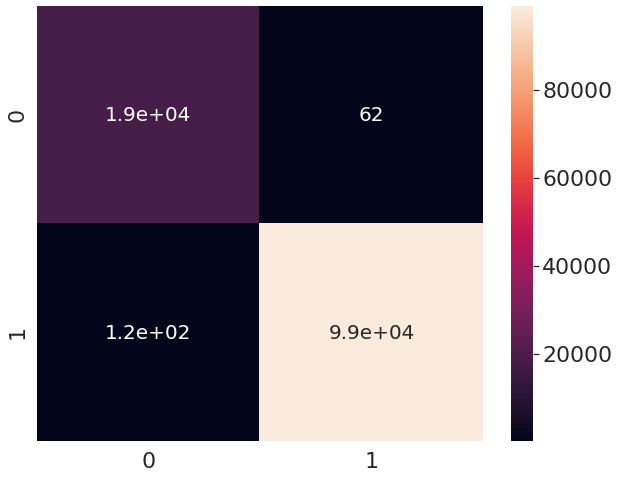

AUC score:  0.9977165039845313


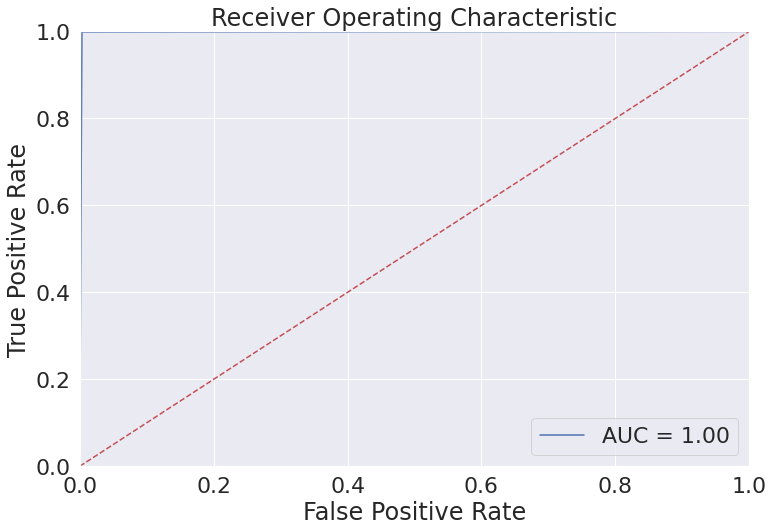

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.995     18647
           2      0.999     0.999     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.997     0.998     0.997    117676
weighted avg      0.998     0.998     0.998    117676



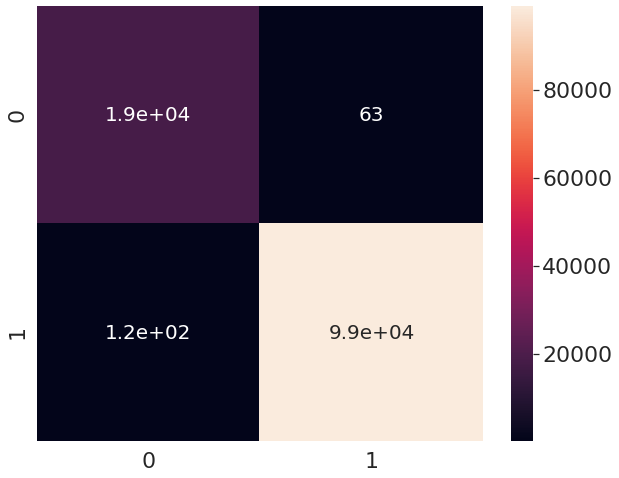

AUC score:  0.9977149351500328


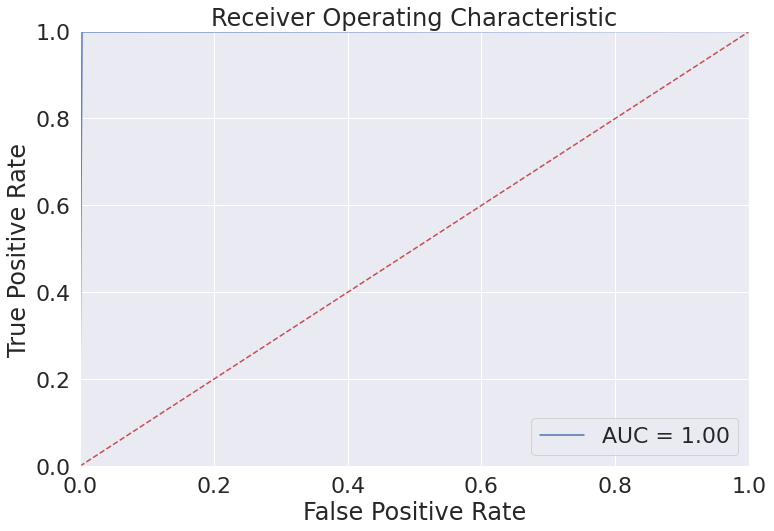

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.214     0.997     0.353     12929
           2      0.999     0.484     0.653     91686

    accuracy                          0.548    104615
   macro avg      0.607     0.741     0.503    104615
weighted avg      0.902     0.548     0.615    104615



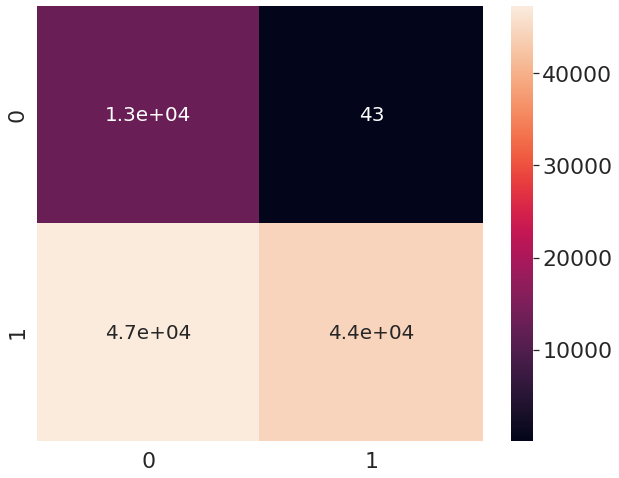

AUC score:  0.7405823436055696


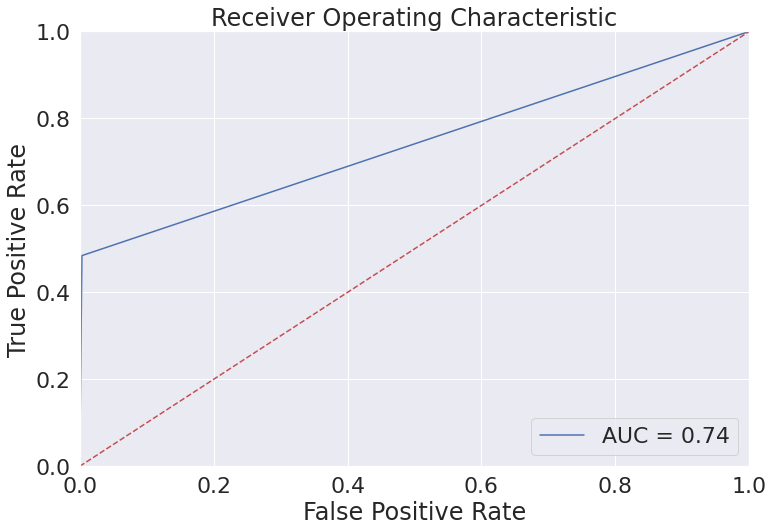

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.220     0.997     0.360     12929
           2      0.999     0.501     0.667     91686

    accuracy                          0.562    104615
   macro avg      0.609     0.749     0.513    104615
weighted avg      0.903     0.562     0.629    104615



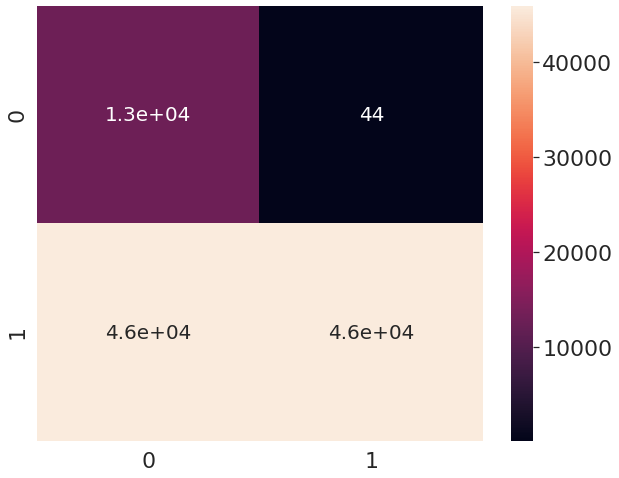

AUC score:  0.7486310560604194


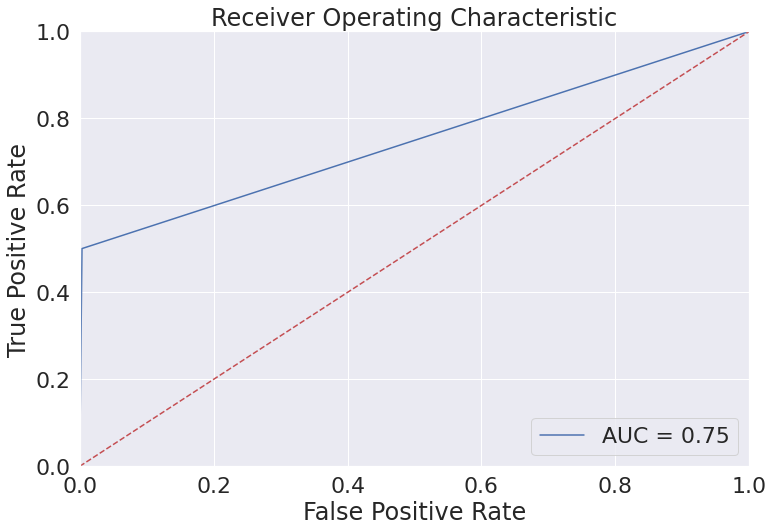

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 8.04159172e-02  1.92372913e-01  1.16039280e-01 ...  1.24434530e-01
   1.29176147e-01  3.34644970e-01]
 [ 3.33450650e-03  6.91335893e-02  1.79751753e-05 ...  4.02994591e-18
  -1.48754395e-35 -9.69700794e-19]
 [ 3.30693475e-03  6.88489496e-02  1.21536303e-10 ...  9.50064968e-19
   3.35802001e-34  0.00000000e+00]
 ...
 [ 1.32304312e-02  7.74571518e-02  4.10934967e-04 ...  3.04603074e-04
  -1.99456882e-07 -4.10338588e-03]
 [ 3.30693456e-03  6.88489477e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.30693469e-03  6.88489483e-02  1.58070261e-11 ...  1.34261928e-18
   2.98245198e-34  5.83786086e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


Perform SOM (turned) train random
0.5
Total train time: 427.2018070220947


### Test on first device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.992     0.997     0.995     18647
           2      0.999     0.999     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.996     0.998     0.997    117676
weighted avg      0.998     0.998     0.998    117676



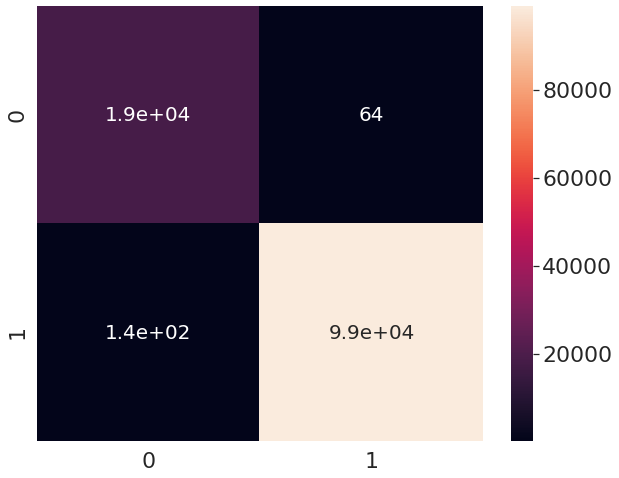

AUC score:  0.9975719935863337


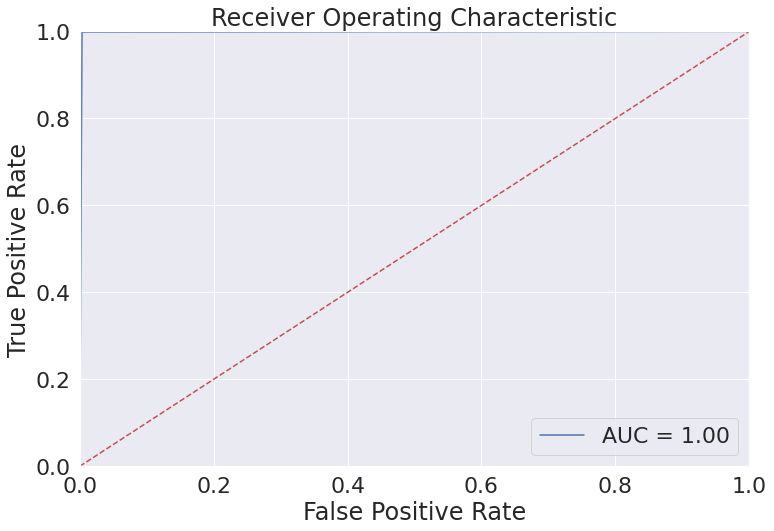

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.993     0.996     0.995     18647
           2      0.999     0.999     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.996     0.998     0.997    117676
weighted avg      0.998     0.998     0.998    117676



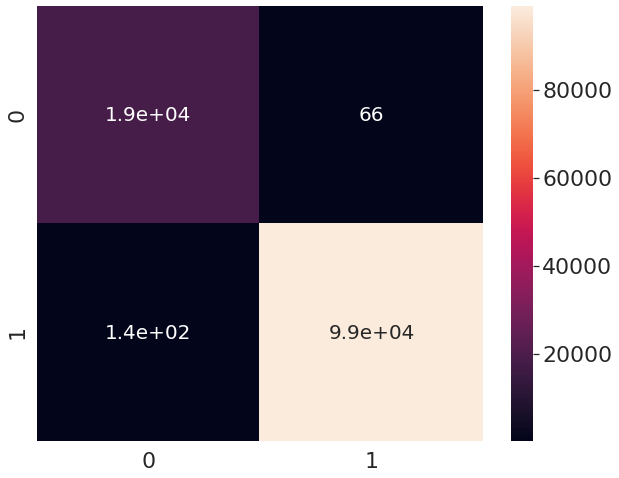

AUC score:  0.9975436107871226


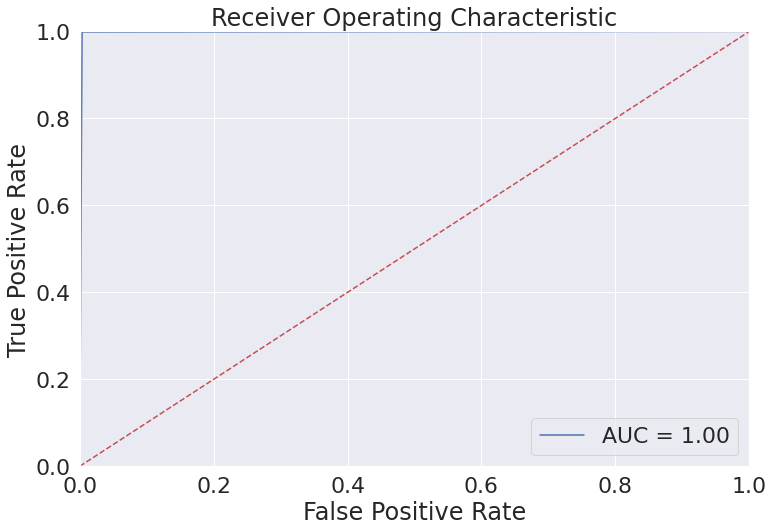

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [37]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.183     0.997     0.309     12929
           2      0.999     0.371     0.541     91686

    accuracy                          0.448    104615
   macro avg      0.591     0.684     0.425    104615
weighted avg      0.898     0.448     0.512    104615



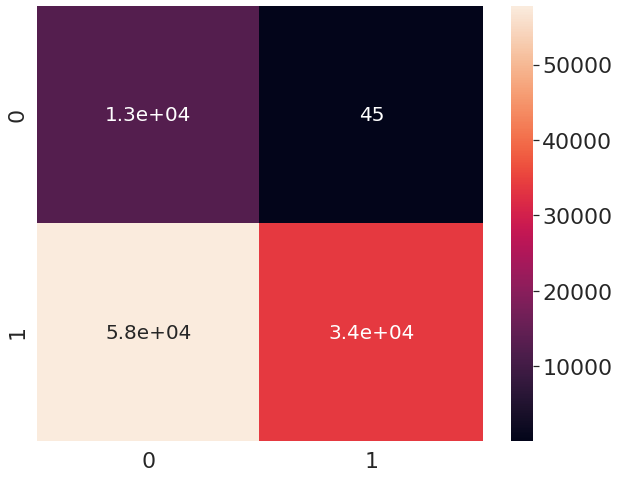

AUC score:  0.683533377572268


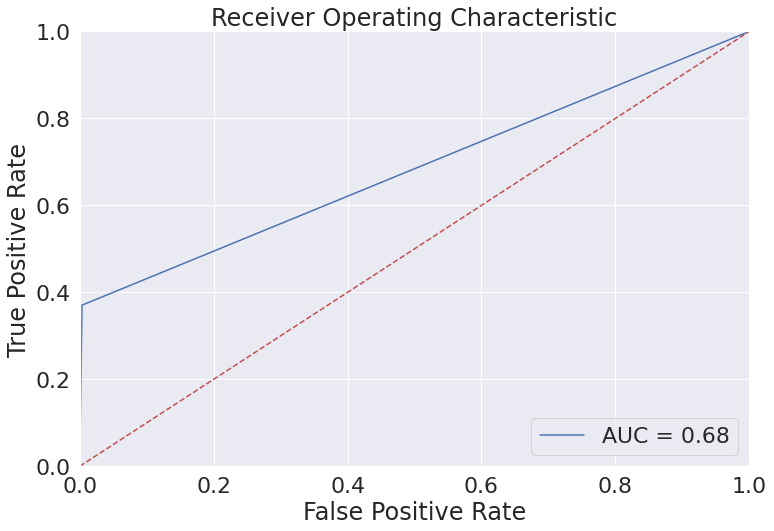

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.184     0.996     0.310     12929
           2      0.999     0.375     0.545     91686

    accuracy                          0.452    104615
   macro avg      0.591     0.686     0.428    104615
weighted avg      0.898     0.452     0.516    104615



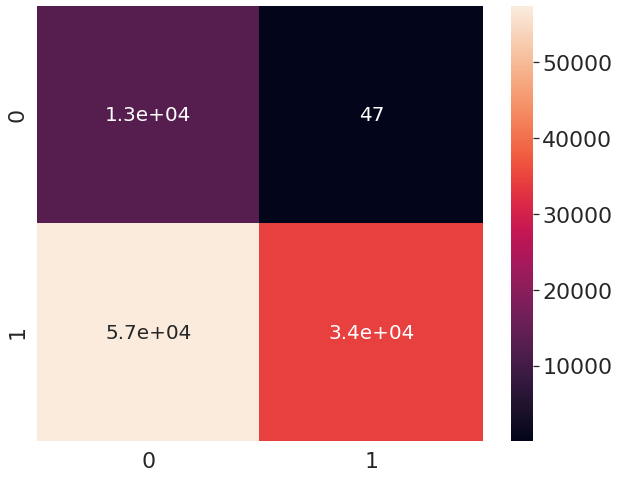

AUC score:  0.6856482969740383


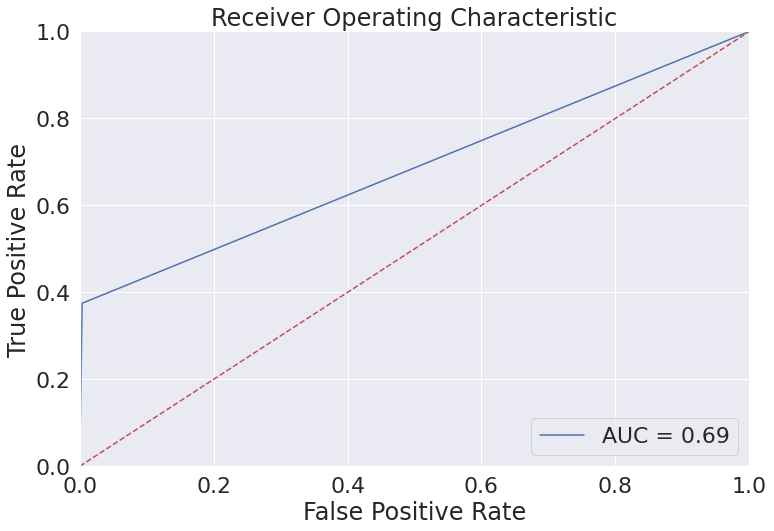

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 8.04159172e-02  1.92372913e-01  1.16039280e-01 ...  1.24434530e-01
   1.29176147e-01  3.34644970e-01]
 [ 3.33450650e-03  6.91335893e-02  1.79751753e-05 ...  4.02994591e-18
  -1.48754395e-35 -9.69700794e-19]
 [ 3.30693475e-03  6.88489496e-02  1.21536303e-10 ...  9.50064968e-19
   3.35802001e-34  0.00000000e+00]
 ...
 [ 1.32304312e-02  7.74571518e-02  4.10934967e-04 ...  3.04603074e-04
  -1.99456882e-07 -4.10338588e-03]
 [ 3.30693456e-03  6.88489477e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.30693469e-03  6.88489483e-02  1.58070261e-11 ...  1.34261928e-18
   2.98245198e-34  5.83786086e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.997     0.994     18647
           2      0.999     0.998     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.995     0.998     0.996    117676
weighted avg      0.998     0.998     0.998    117676



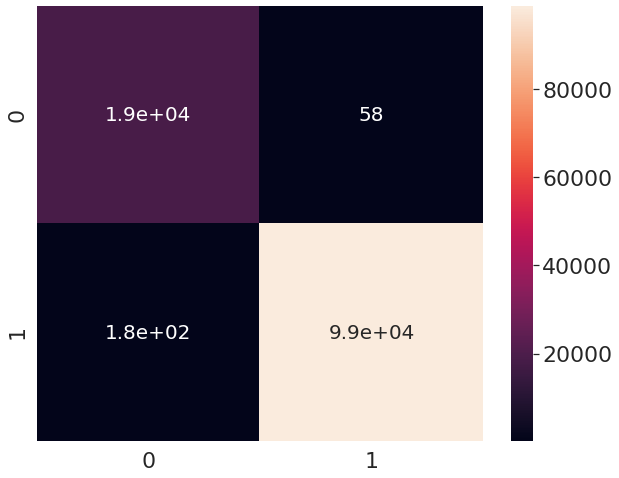

AUC score:  0.9975511124370673


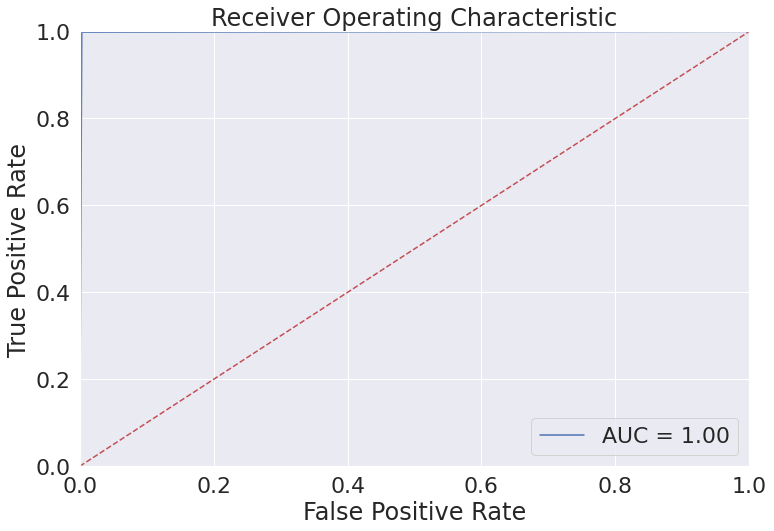

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.997     0.994     18647
           2      0.999     0.998     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.995     0.998     0.996    117676
weighted avg      0.998     0.998     0.998    117676



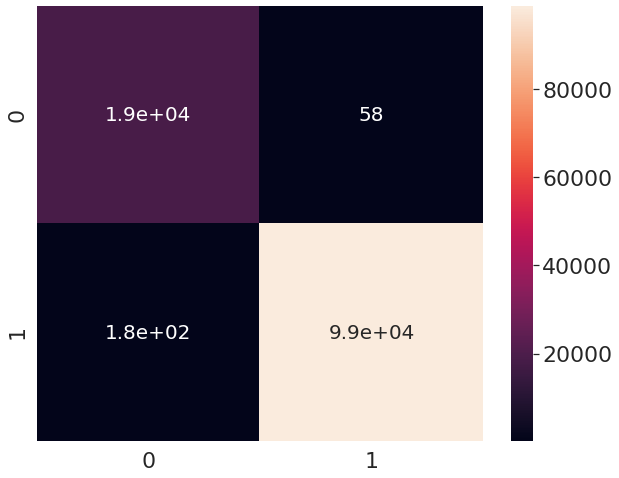

AUC score:  0.9975511124370673


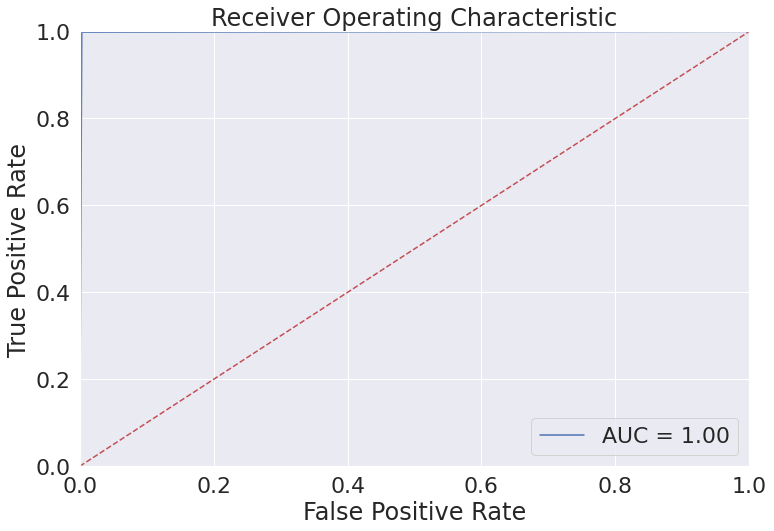

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.997     0.307     12929
           2      0.999     0.365     0.535     91686

    accuracy                          0.443    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.443     0.507    104615



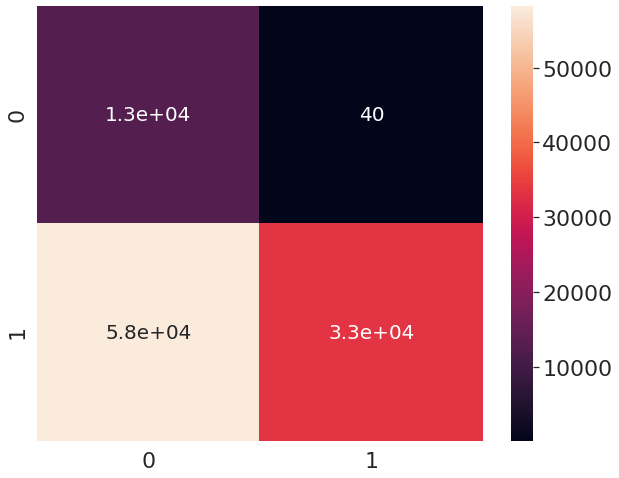

AUC score:  0.6810763912201883


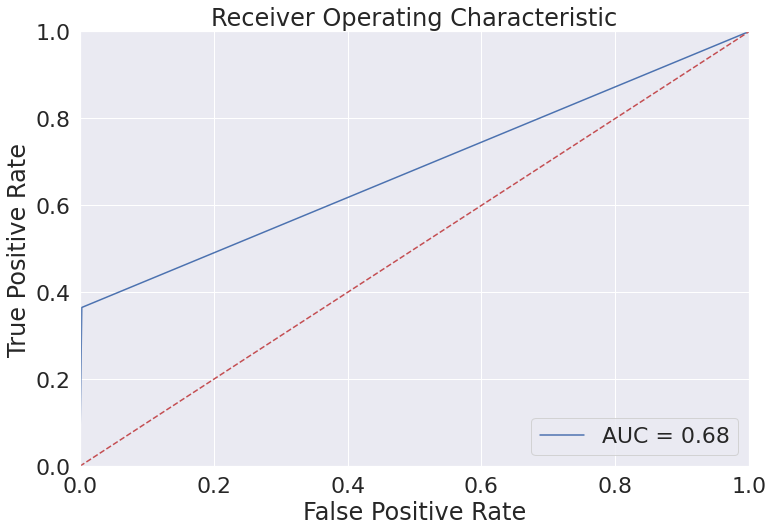

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.997     0.307     12929
           2      0.999     0.365     0.535     91686

    accuracy                          0.443    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.443     0.507    104615



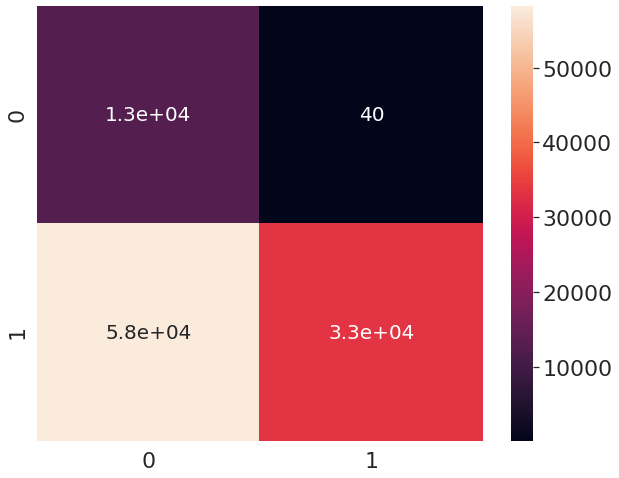

AUC score:  0.6810763912201883


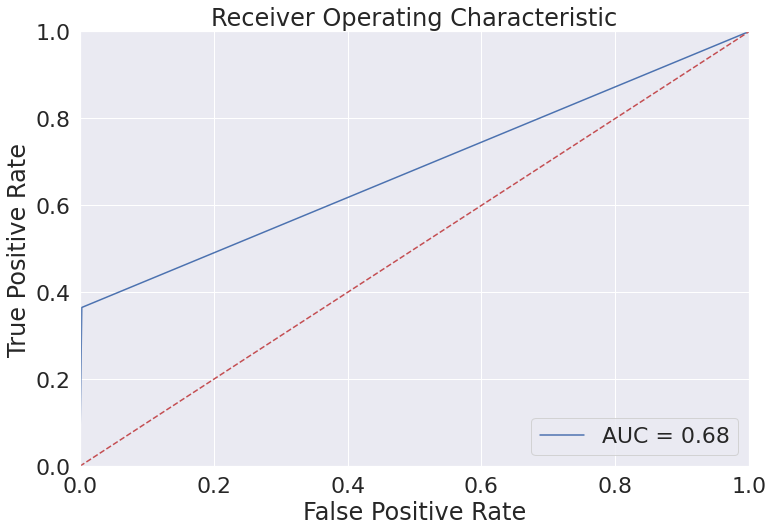

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.4. Anneal

### Train

In [45]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 8.04159172e-02  1.92372913e-01  1.16039280e-01 ...  1.24434530e-01
   1.29176147e-01  3.34644970e-01]
 [ 3.33450650e-03  6.91335893e-02  1.79751753e-05 ...  4.02994591e-18
  -1.48754395e-35 -9.69700794e-19]
 [ 3.30693475e-03  6.88489496e-02  1.21536303e-10 ...  9.50064968e-19
   3.35802001e-34  0.00000000e+00]
 ...
 [ 1.32304312e-02  7.74571518e-02  4.10934967e-04 ...  3.04603074e-04
  -1.99456882e-07 -4.10338588e-03]
 [ 3.30693456e-03  6.88489477e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.30693469e-03  6.88489483e-02  1.58070261e-11 ...  1.34261928e-18
   2.98245198e-34  5.83786086e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.996     0.995     18647
           2      0.999     0.999     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.997     0.997     0.997    117676
weighted avg      0.998     0.998     0.998    117676



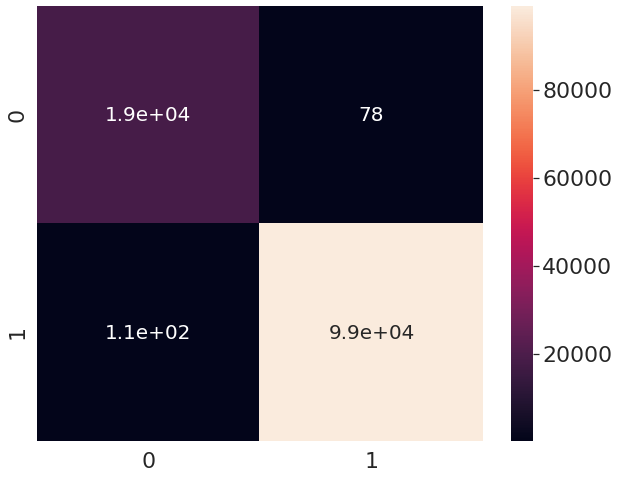

AUC score:  0.9973531178876834


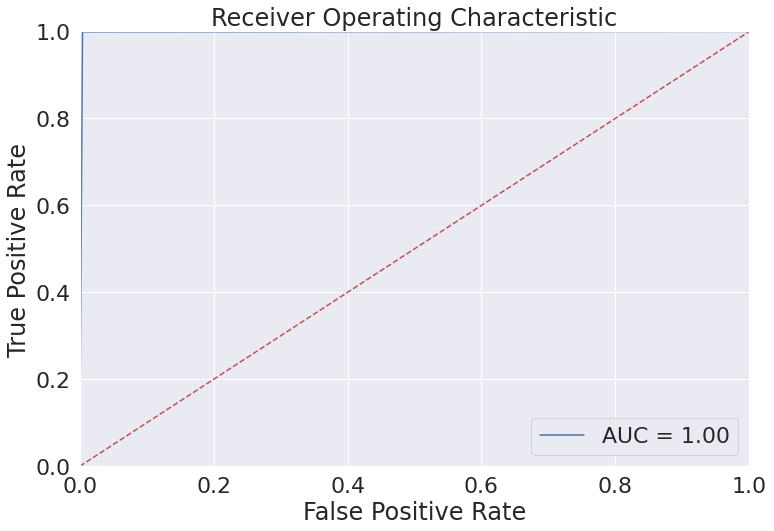

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.996     0.995     18647
           2      0.999     0.999     0.999     99029

    accuracy                          0.998    117676
   macro avg      0.997     0.997     0.997    117676
weighted avg      0.998     0.998     0.998    117676



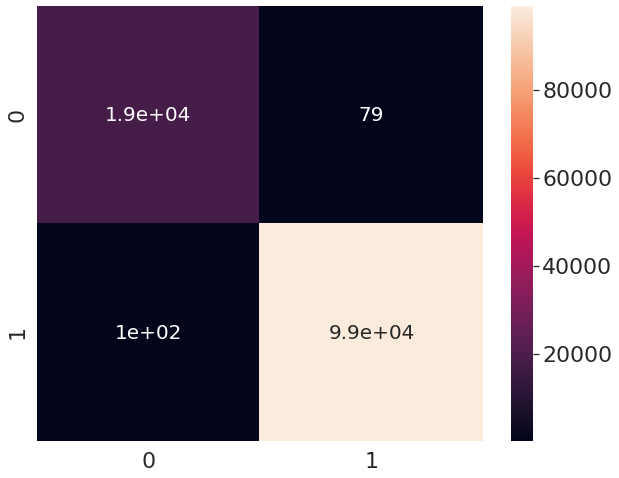

AUC score:  0.9973666961313136


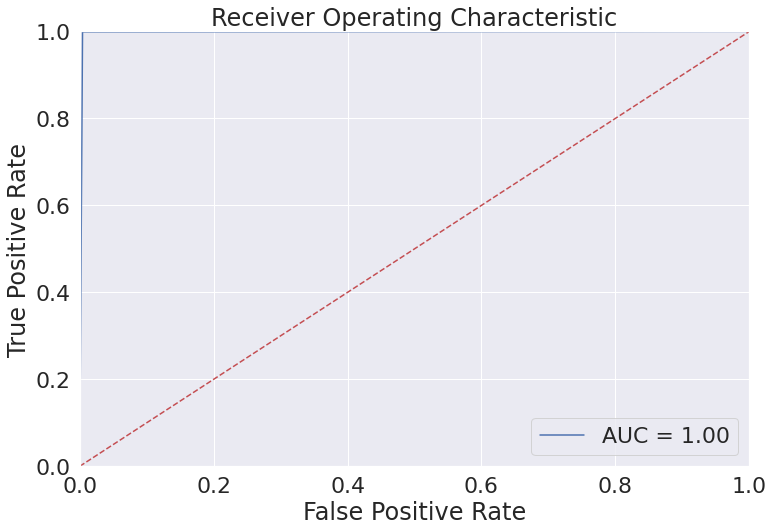

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.207     0.995     0.343     12929
           2      0.999     0.462     0.632     91686

    accuracy                          0.528    104615
   macro avg      0.603     0.729     0.487    104615
weighted avg      0.901     0.528     0.596    104615



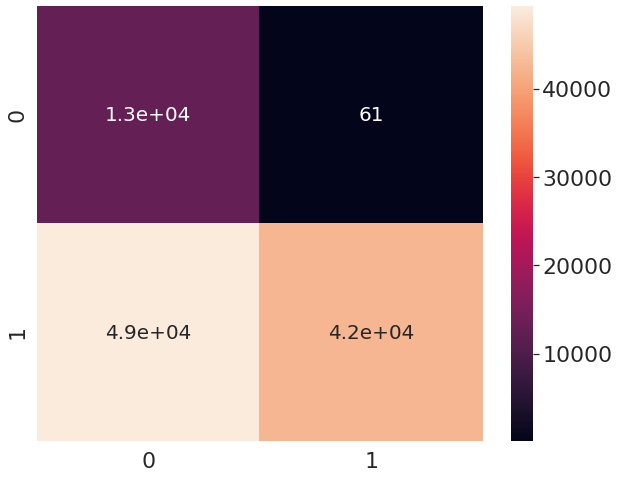

AUC score:  0.7287722144957424


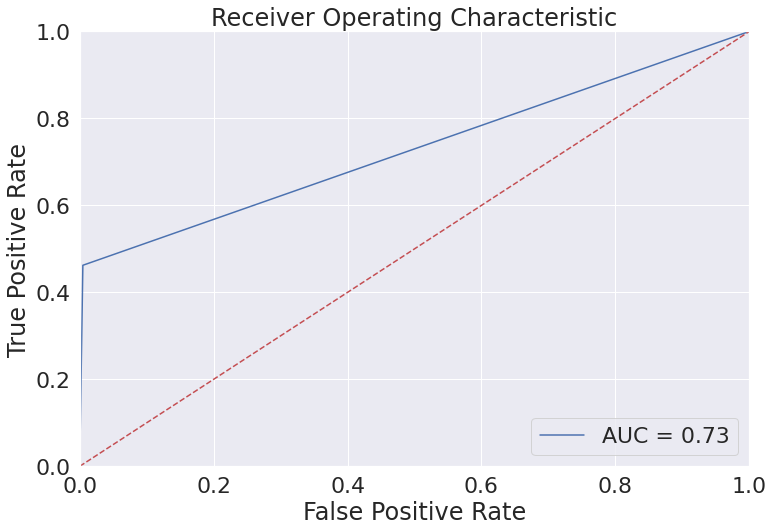

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.207     0.995     0.343     12929
           2      0.999     0.463     0.633     91686

    accuracy                          0.529    104615
   macro avg      0.603     0.729     0.488    104615
weighted avg      0.901     0.529     0.597    104615



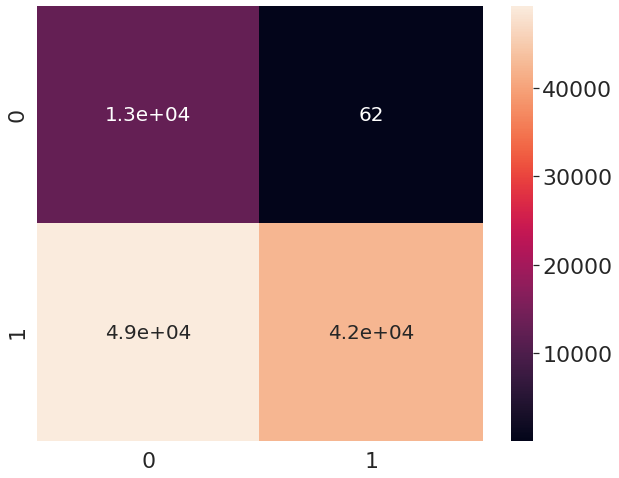

AUC score:  0.7291425463908555


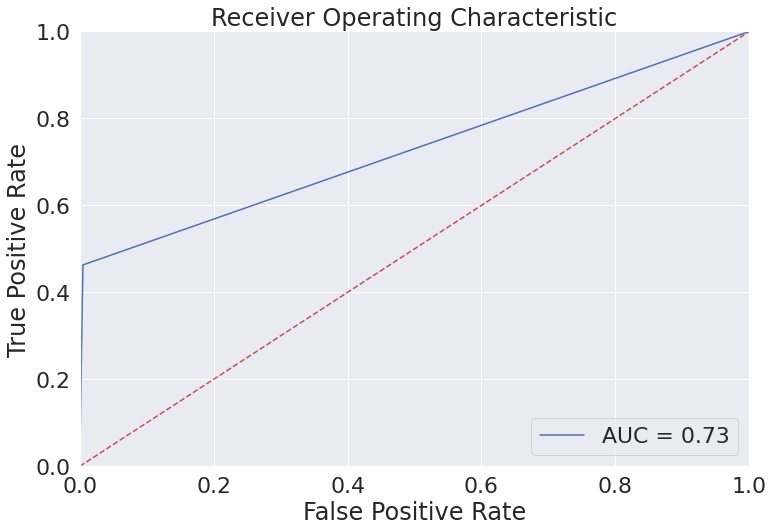

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [50]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='rand')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 6.43453023e-02  2.84148817e-01  1.16039280e-01 ...  1.42249879e-01
   3.98396992e-01  4.99268165e-01]
 [ 2.66812636e-03  1.02115352e-01  1.79751753e-05 ...  4.60691513e-18
  -4.58779001e-35 -1.44672946e-18]
 [ 2.64606465e-03  1.01694918e-01  1.21536303e-10 ...  1.08608621e-18
   1.03565953e-33  0.00000000e+00]
 ...
 [ 1.05864128e-02  1.14409860e-01  4.10934967e-04 ...  3.48213238e-04
  -6.15152438e-07 -6.12198038e-03]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.64606461e-03  1.01694916e-01  1.58070261e-11 ...  1.53484271e-18
   9.19829185e-34  8.70970235e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.947     0.995     0.970     18647
           2      0.999     0.989     0.994     99029

    accuracy                          0.990    117676
   macro avg      0.973     0.992     0.982    117676
weighted avg      0.991     0.990     0.990    117676



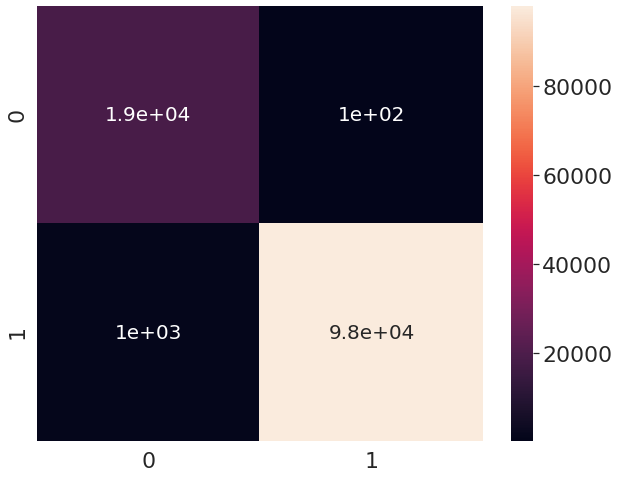

AUC score:  0.9919786453324005


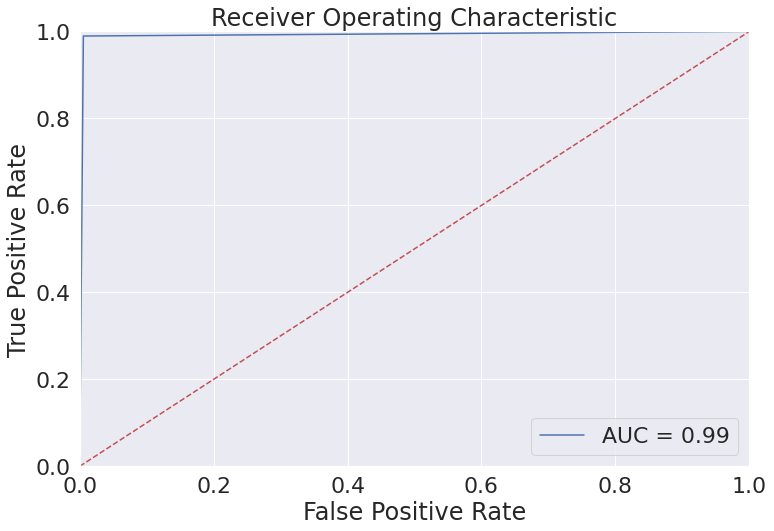

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.947     0.995     0.970     18647
           2      0.999     0.989     0.994     99029

    accuracy                          0.990    117676
   macro avg      0.973     0.992     0.982    117676
weighted avg      0.991     0.990     0.990    117676



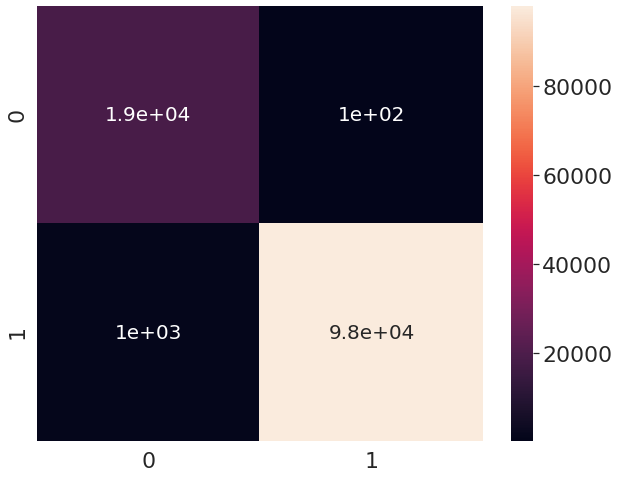

AUC score:  0.992003890462615


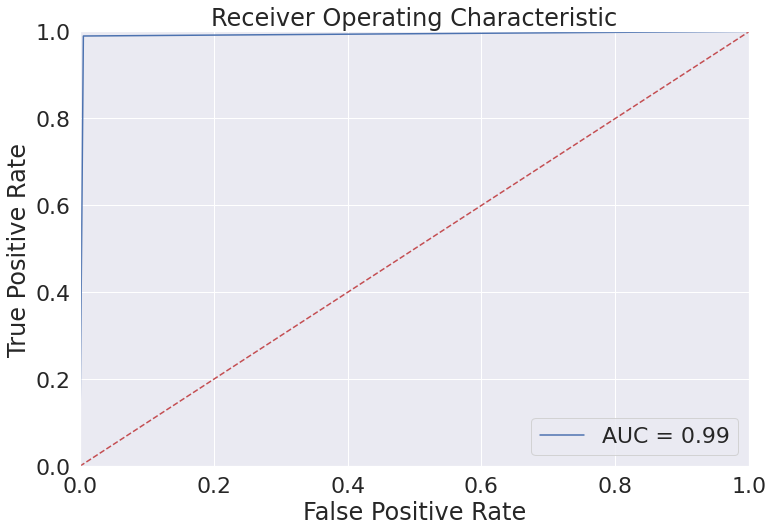

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.995     0.995     12929
           2      0.999     0.999     0.999     91686

    accuracy                          0.999    104615
   macro avg      0.997     0.997     0.997    104615
weighted avg      0.999     0.999     0.999    104615



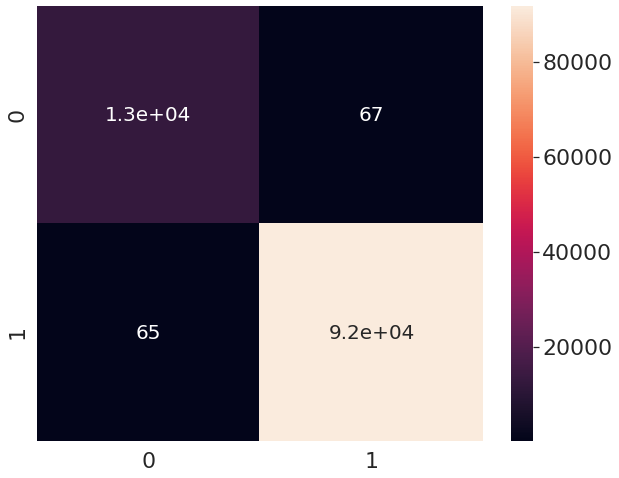

AUC score:  0.9970544549775184


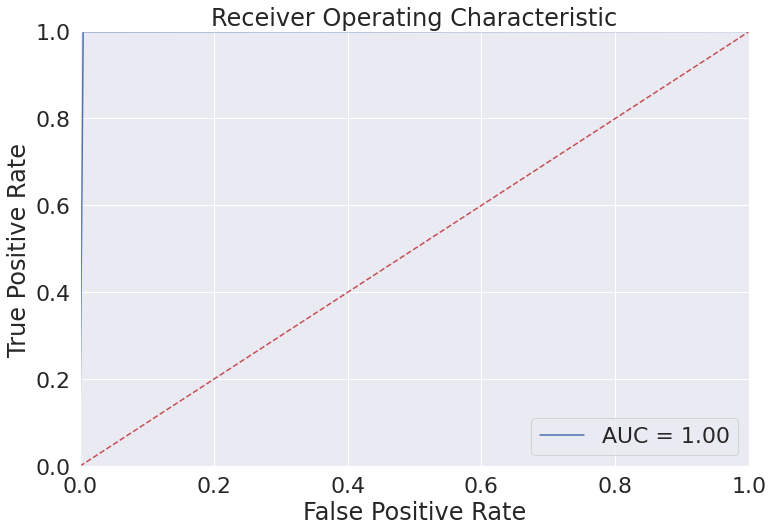

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [53]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.995     0.995     12929
           2      0.999     0.999     0.999     91686

    accuracy                          0.999    104615
   macro avg      0.997     0.997     0.997    104615
weighted avg      0.999     0.999     0.999    104615



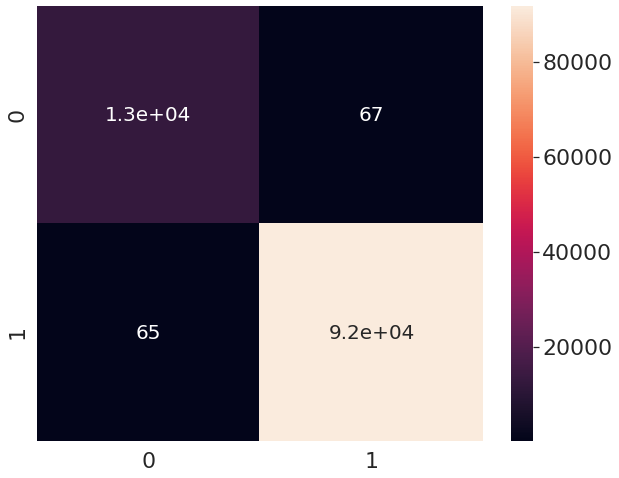

AUC score:  0.9970544549775184


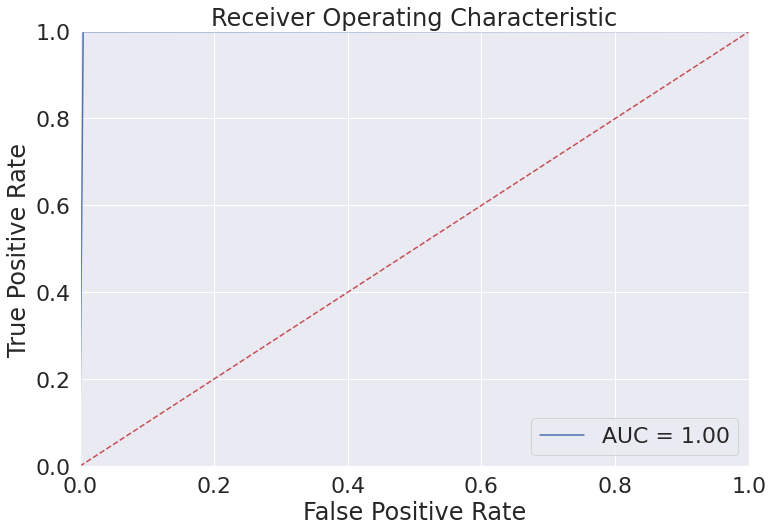

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [55]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='tpe')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 6.43453023e-02  2.84148817e-01  1.16039280e-01 ...  1.42249879e-01
   3.98396992e-01  4.99268165e-01]
 [ 2.66812636e-03  1.02115352e-01  1.79751753e-05 ...  4.60691513e-18
  -4.58779001e-35 -1.44672946e-18]
 [ 2.64606465e-03  1.01694918e-01  1.21536303e-10 ...  1.08608621e-18
   1.03565953e-33  0.00000000e+00]
 ...
 [ 1.05864128e-02  1.14409860e-01  4.10934967e-04 ...  3.48213238e-04
  -6.15152438e-07 -6.12198038e-03]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.64606461e-03  1.01694916e-01  1.58070261e-11 ...  1.53484271e-18
   9.19829185e-34  8.70970235e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.483     0.998     0.651     18647
           2      0.999     0.799     0.888     99029

    accuracy                          0.831    117676
   macro avg      0.741     0.898     0.770    117676
weighted avg      0.918     0.831     0.851    117676



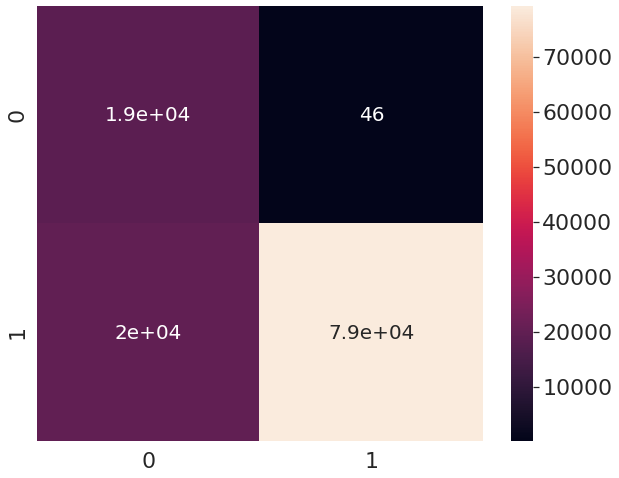

AUC score:  0.8983060864480998


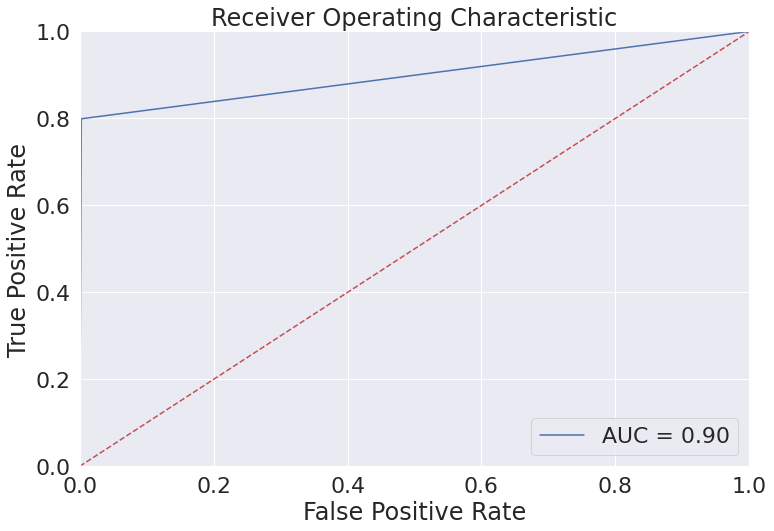

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [56]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.668     0.998     0.800     18647
           2      0.999     0.907     0.951     99029

    accuracy                          0.921    117676
   macro avg      0.834     0.952     0.876    117676
weighted avg      0.947     0.921     0.927    117676



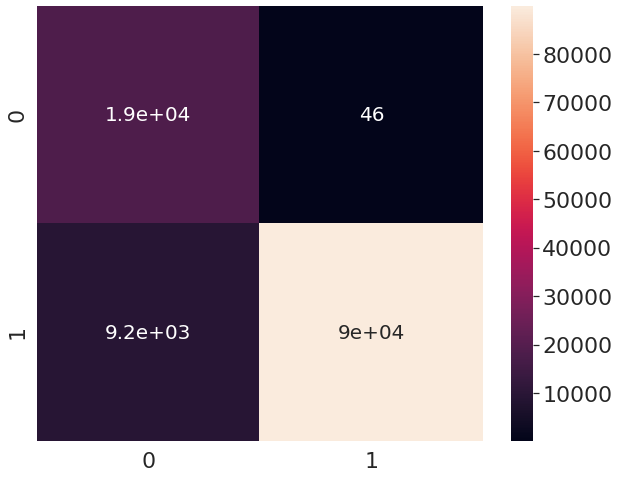

AUC score:  0.9521539491953759


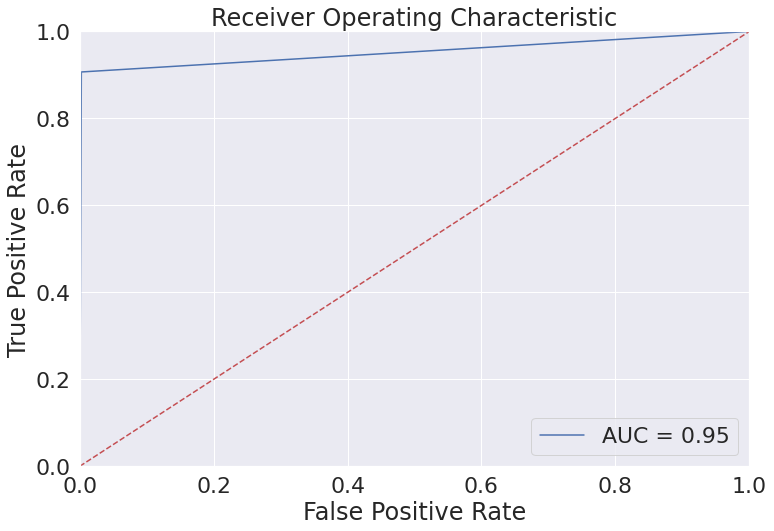

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     12929
           2      1.000     1.000     1.000     91686

    accuracy                          0.999    104615
   macro avg      0.999     0.999     0.999    104615
weighted avg      0.999     0.999     0.999    104615



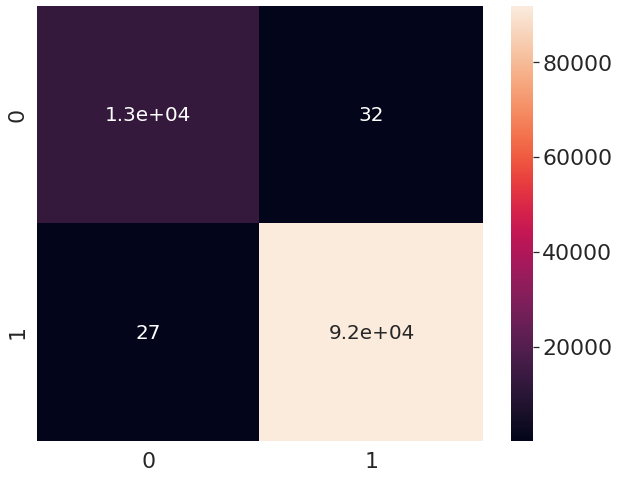

AUC score:  0.99861523028959


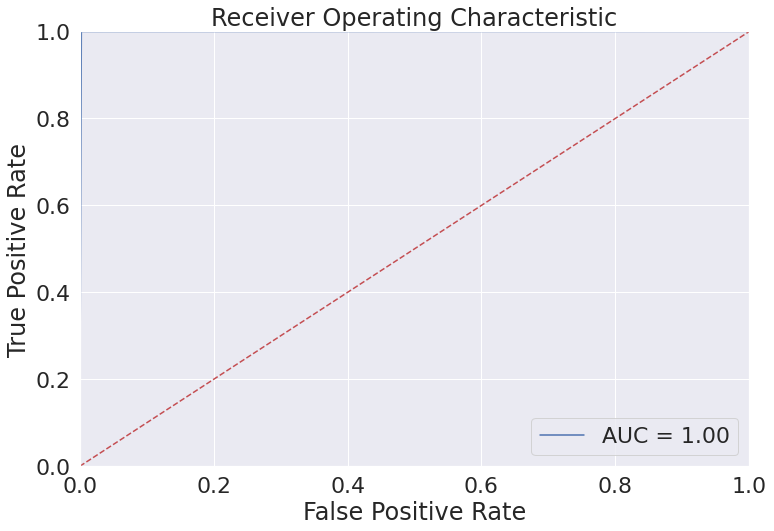

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     12929
           2      1.000     1.000     1.000     91686

    accuracy                          0.999    104615
   macro avg      0.999     0.999     0.999    104615
weighted avg      0.999     0.999     0.999    104615



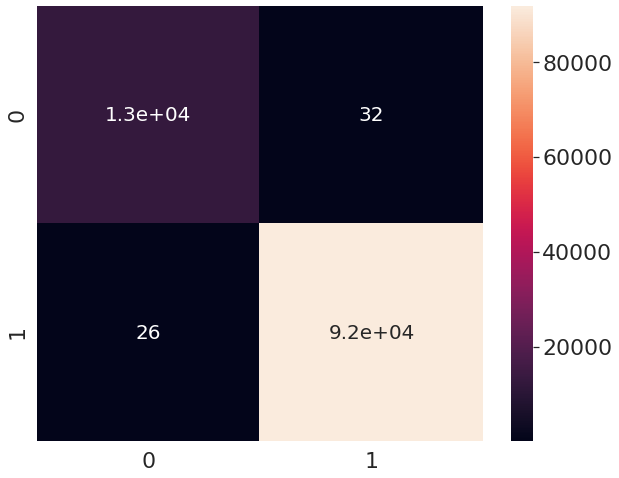

AUC score:  0.9986206836848738


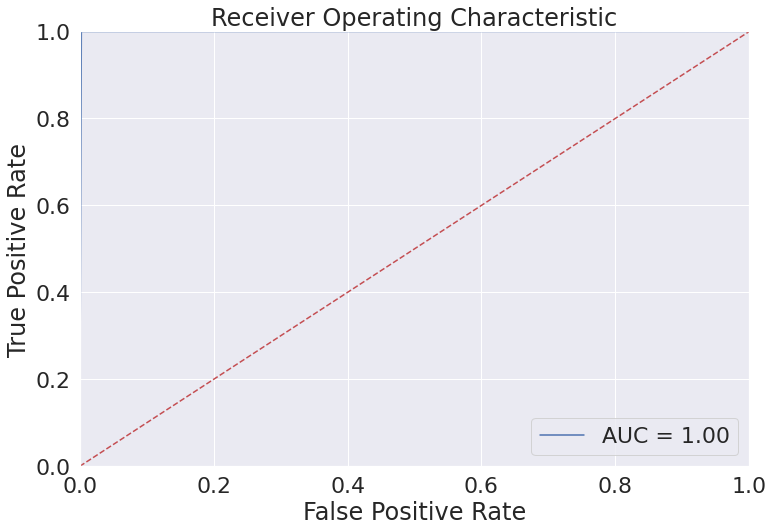

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [59]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [60]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 6.43453023e-02  2.84148817e-01  1.16039280e-01 ...  1.42249879e-01
   3.98396992e-01  4.99268165e-01]
 [ 2.66812636e-03  1.02115352e-01  1.79751753e-05 ...  4.60691513e-18
  -4.58779001e-35 -1.44672946e-18]
 [ 2.64606465e-03  1.01694918e-01  1.21536303e-10 ...  1.08608621e-18
   1.03565953e-33  0.00000000e+00]
 ...
 [ 1.05864128e-02  1.14409860e-01  4.10934967e-04 ...  3.48213238e-04
  -6.15152438e-07 -6.12198038e-03]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.64606461e-03  1.01694916e-01  1.58070261e-11 ...  1.53484271e-18
   9.19829185e-34  8.70970235e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.983     0.990     0.987     18647
           2      0.998     0.997     0.997     99029

    accuracy                          0.996    117676
   macro avg      0.991     0.994     0.992    117676
weighted avg      0.996     0.996     0.996    117676



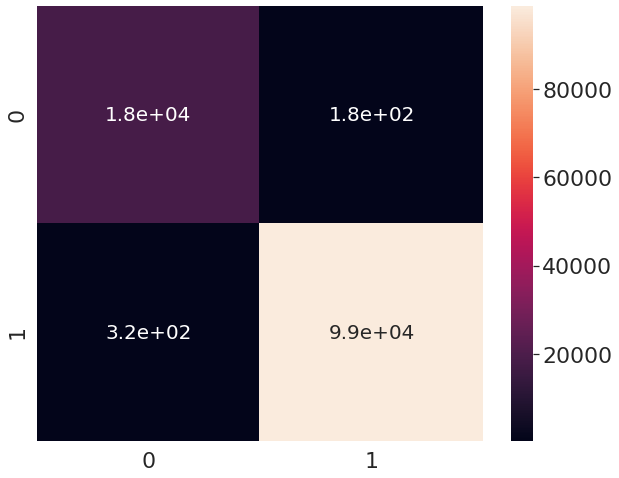

AUC score:  0.9935694649045557


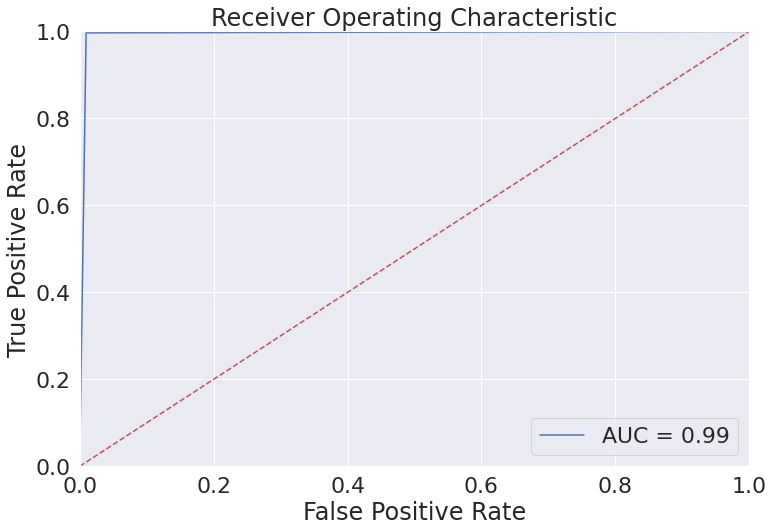

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.990     0.988     18647
           2      0.998     0.997     0.998     99029

    accuracy                          0.996    117676
   macro avg      0.992     0.994     0.993    117676
weighted avg      0.996     0.996     0.996    117676



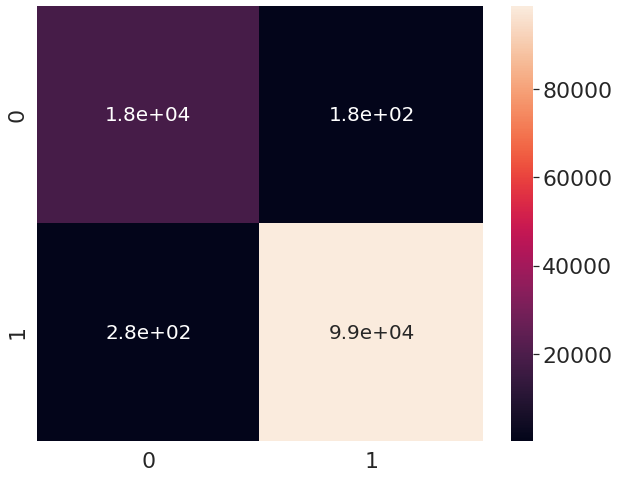

AUC score:  0.9937815239983565


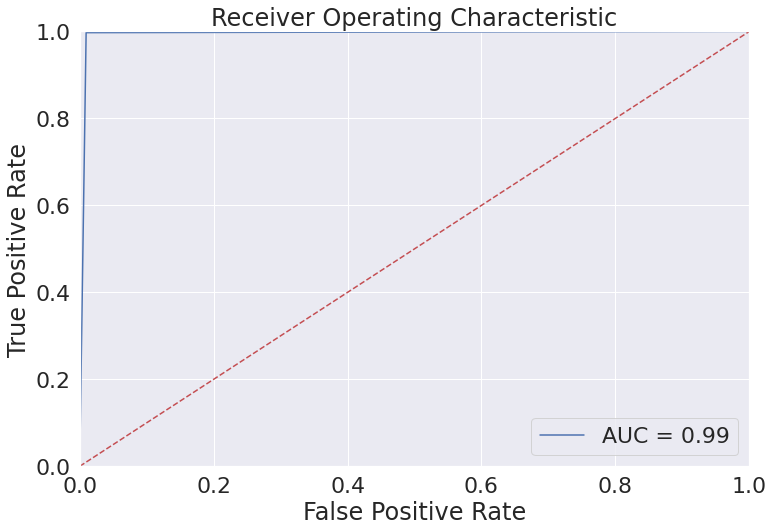

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [62]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.989     0.991     0.990     12929
           2      0.999     0.998     0.999     91686

    accuracy                          0.997    104615
   macro avg      0.994     0.995     0.994    104615
weighted avg      0.997     0.997     0.997    104615



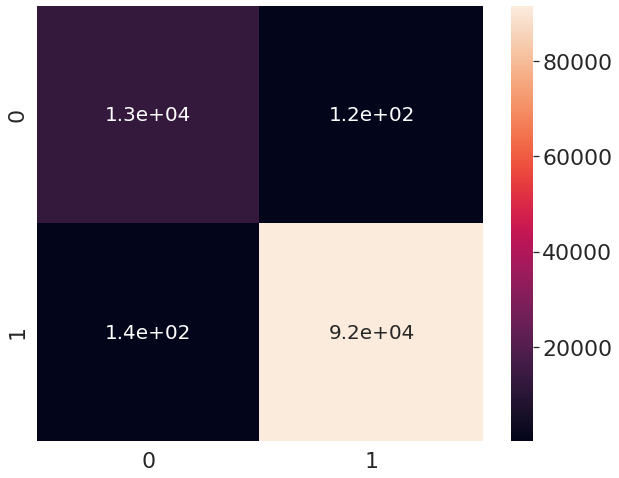

AUC score:  0.9945184490163522


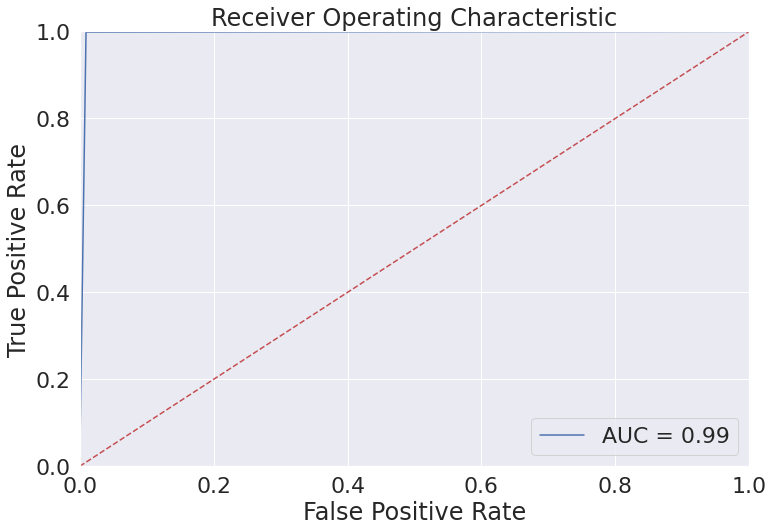

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.989     0.991     0.990     12929
           2      0.999     0.998     0.999     91686

    accuracy                          0.997    104615
   macro avg      0.994     0.995     0.994    104615
weighted avg      0.997     0.997     0.997    104615



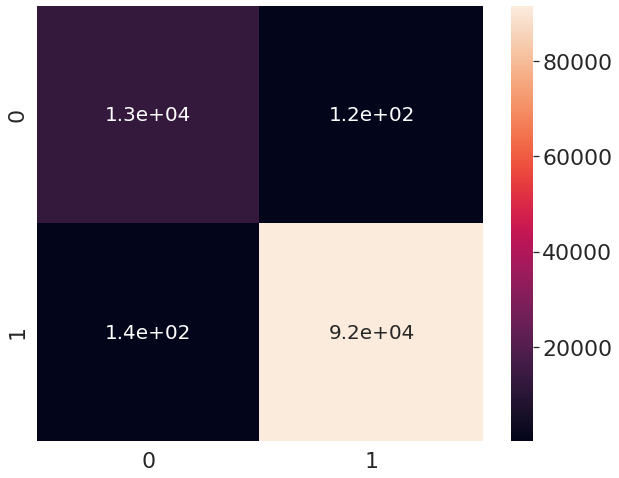

AUC score:  0.9945184490163522


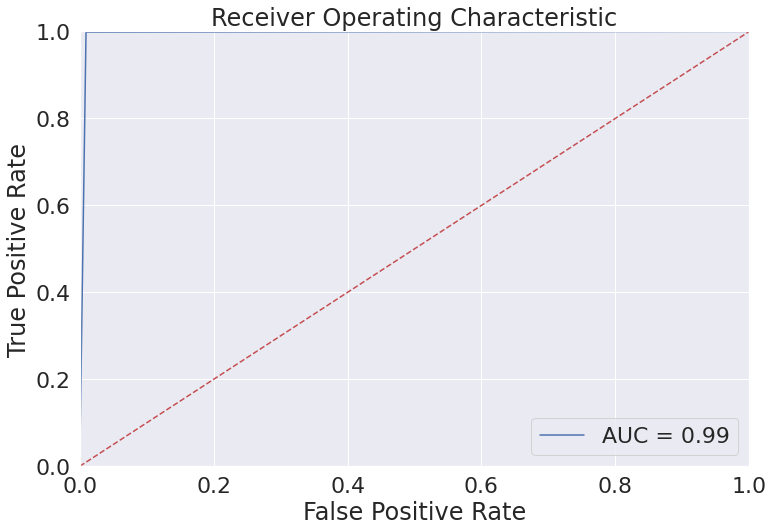

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.4. ANNEAL

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='anneal')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 6.43453023e-02  2.84148817e-01  1.16039280e-01 ...  1.42249879e-01
   3.98396992e-01  4.99268165e-01]
 [ 2.66812636e-03  1.02115352e-01  1.79751753e-05 ...  4.60691513e-18
  -4.58779001e-35 -1.44672946e-18]
 [ 2.64606465e-03  1.01694918e-01  1.21536303e-10 ...  1.08608621e-18
   1.03565953e-33  0.00000000e+00]
 ...
 [ 1.05864128e-02  1.14409860e-01  4.10934967e-04 ...  3.48213238e-04
  -6.15152438e-07 -6.12198038e-03]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.64606461e-03  1.01694916e-01  1.58070261e-11 ...  1.53484271e-18
   9.19829185e-34  8.70970235e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.464     0.998     0.634     18647
           2      0.999     0.783     0.878     99029

    accuracy                          0.817    117676
   macro avg      0.732     0.891     0.756    117676
weighted avg      0.915     0.817     0.840    117676



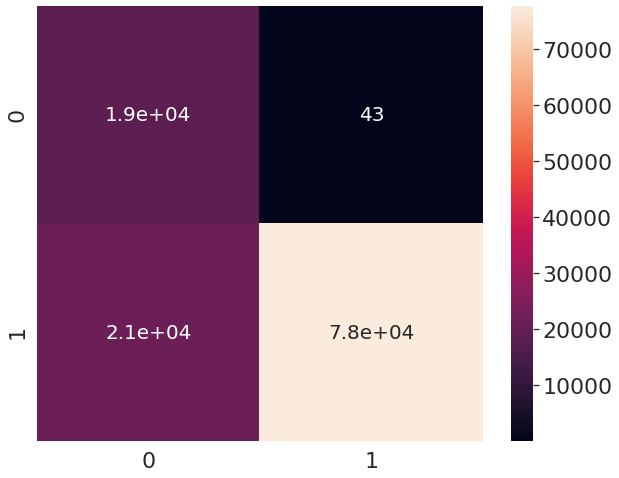

AUC score:  0.8905302438195226


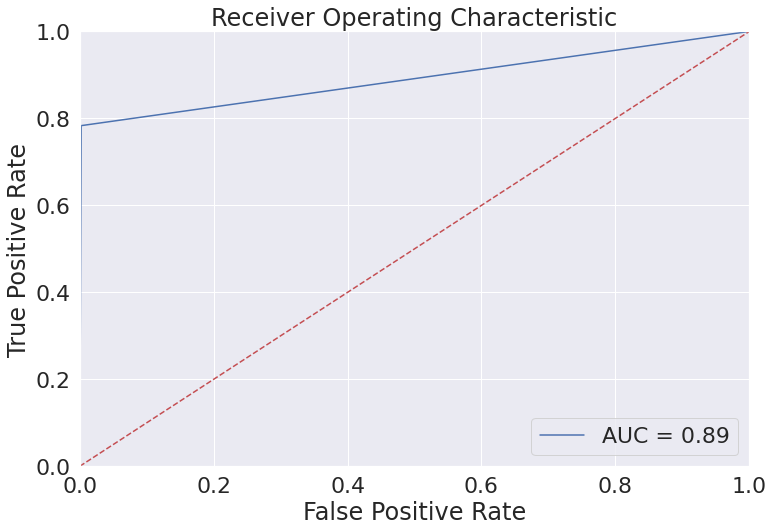

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.757     0.998     0.861     18647
           2      1.000     0.940     0.969     99029

    accuracy                          0.949    117676
   macro avg      0.878     0.969     0.915    117676
weighted avg      0.961     0.949     0.952    117676



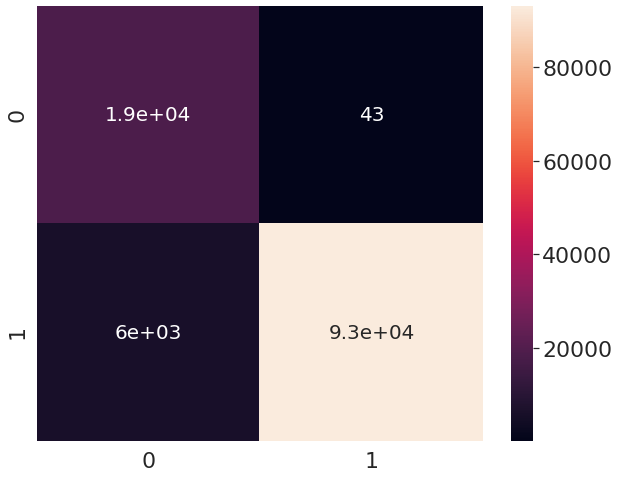

AUC score:  0.9686689708590768


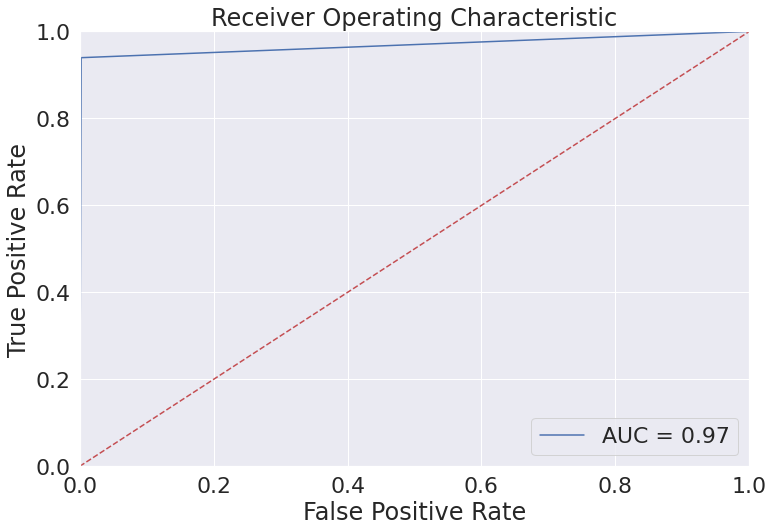

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.989     0.998     0.993     12929
           2      1.000     0.998     0.999     91686

    accuracy                          0.998    104615
   macro avg      0.994     0.998     0.996    104615
weighted avg      0.998     0.998     0.998    104615



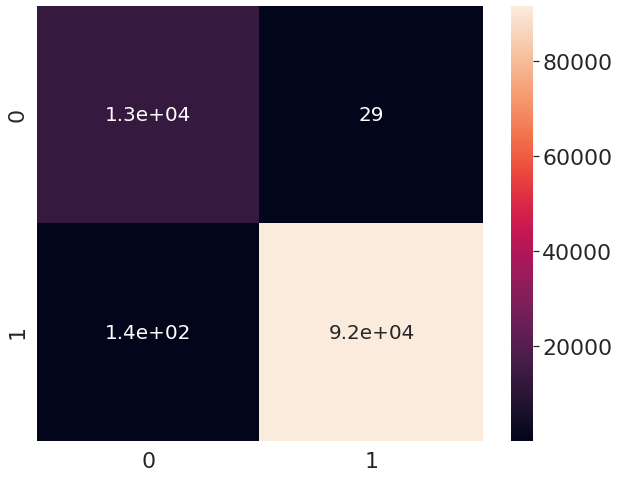

AUC score:  0.9981150148760474


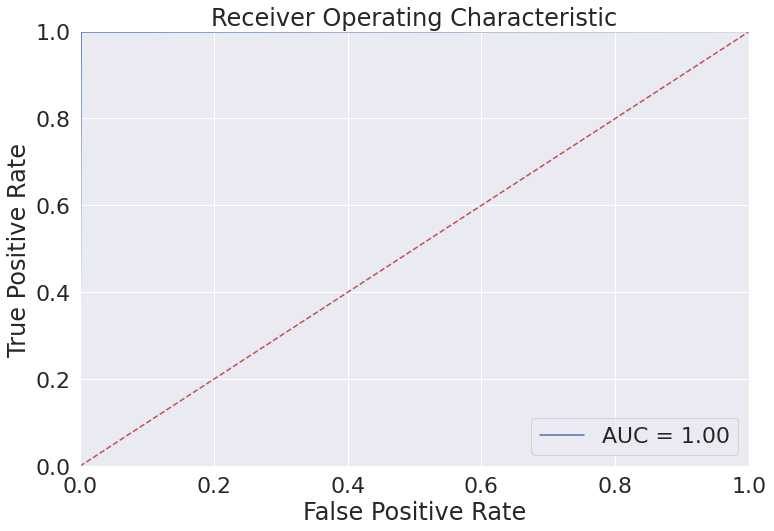

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.990     0.998     0.994     12929
           2      1.000     0.999     0.999     91686

    accuracy                          0.999    104615
   macro avg      0.995     0.998     0.997    104615
weighted avg      0.999     0.999     0.999    104615



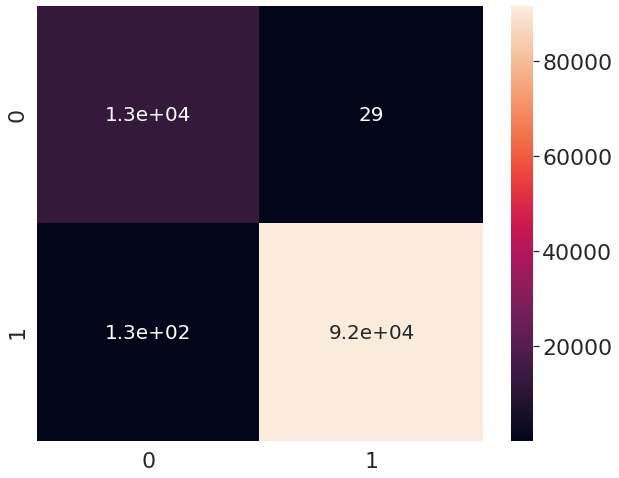

AUC score:  0.9981913624100222


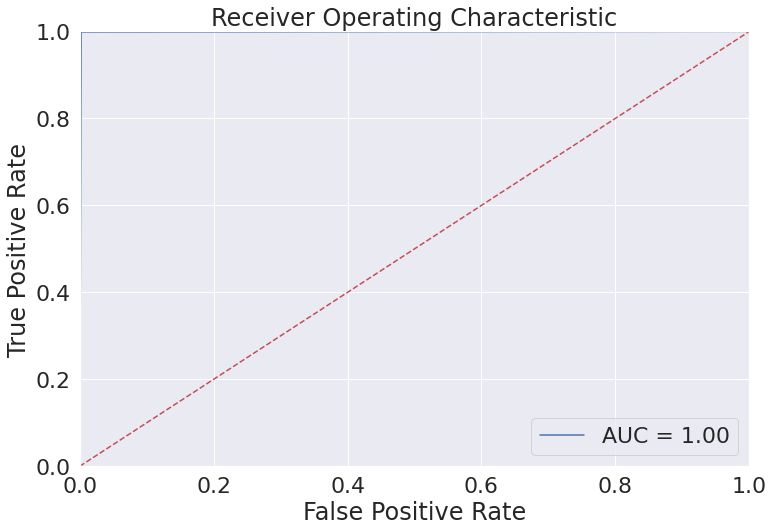

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)